# Introduction to sound waves

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper 
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.grid()


## Waves
We can first consider sound as a wave, similar to many other physical phenomena. Hence, this representative analysis can be applied to other types of waves. 

A pure tone can be represented by a sine wave that has a frequency in units of Hertz (cycles per second) and amplitude (related to how 'loud' the sound is). First, we can consider a sine wave with a frequency of 2 Hz and amplitude of 3 arbitrary units (apply appropriate units here).

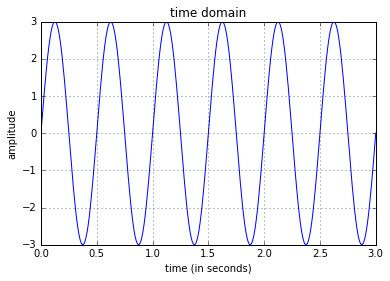

In [9]:
freq = 2 #hz - cycles per second
a  = 3
t  = 3 # time second
fs = 100 # samples per second (avoid aliasing, fs>2*freq )
n_samples = fs * t

t = np.linspace(0, t, n_samples)
signal = [amplitude * np.sin(freq * i * 2*np.pi) for i in t] 

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signal)

However, most sounds do not recorded or made as pure tones, and are instead the addition of multiple sound waves of different frequencies and amplitudes, and likely contain some noise (due to background, electronics, etc). These multiple signals are superimposed (added together to form a single wave) as illustrated below. Note the distortion to the primary tone (blue curve) after the addition of noise and other low amplitude waves (superimposed wave is red). 

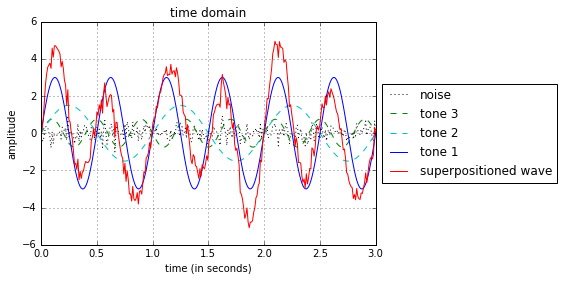

In [43]:
y0 = a*np.sin(2 * np.pi * freq * t)         # primary tone 1
y1 = a/2*np.sin(2 * np.pi * freq/2 * t)     # tone 2
y2 = a/4*np.sin(2 * np.pi * freq*1.25 * t)  # tone 3
yn = np.random.normal(0,a/10,len(t))           # random background/electronic noise

# the superpositioned wave:
y = y0+y1+y2+yn


setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, yn,'k:', label = 'noise')
plt.plot(t, y2,'g--', label = 'tone 3')
plt.plot(t, y1,'c--', label = 'tone 2')
plt.plot(t, y0,'b-', label = 'tone 1')
plt.plot(t, y, '-r',label = 'superpositioned wave')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

We can see that some parts of the wave are interfered with negatively and some positively, depending on the phase of the wave. That is, there is phase effects (cancelation or superposition) in the final cummulative wave. 

This effect can be illustrated by considering two waves that are 180 degrees out of phase and added together to produce a cummulative wave that has zero amplitude:

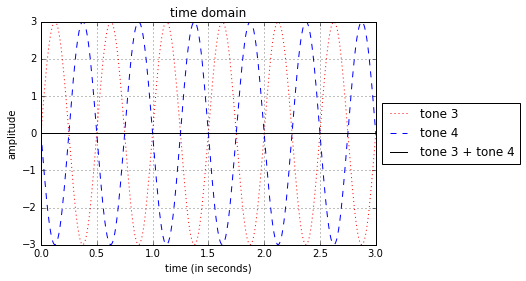

In [45]:
y3 = a*np.sin(2 * np.pi * freq * t)   # tone 3
y4 = -a * np.sin(2 * np.pi * freq * t)# tone 4

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, y3,'r:', label = 'tone 3')
plt.plot(t, y4,'b--', label = 'tone 4')
plt.plot(t, y3+y4,'k-', label = 'tone 3 + tone 4')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## EXAMPLE: a real sound in the time domain is the right whale call measured with some background noise:

One signal is known to be a whale call. The other is known to be noise. How would one distinguish these two signals without a priori knowledge?

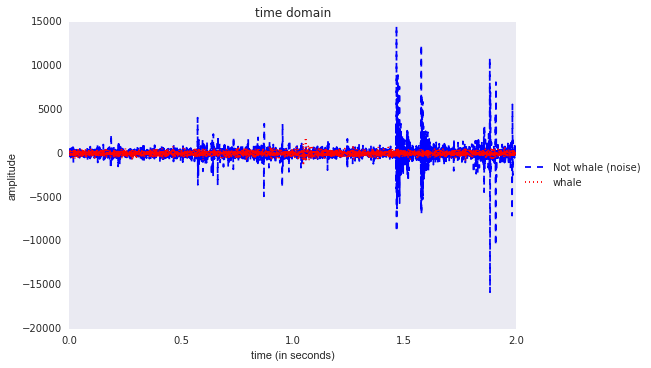

In [64]:
import pandas as pd
import seaborn as sns 
import aifc
pd.options.mode.chained_assignment = None 

# training data
trainData = pd.read_csv('data/train.csv')
# indices in trainData that contain a whale call:
iWhaleCall   = [i for i, x in enumerate(trainData.label) if x == 1]
iNoWhaleCall = [i for i, x in enumerate(trainData.label) if x == 0]

clips = list(trainData.clip_name)

# data file names for example data
posFN =  'data/train/train'+str(iWhaleCall[200])+'.aiff'
negFN =  'data/train/train'+str(iNoWhaleCall[100])+'.aiff'

# open data files and sort
posSig = aifc.open(posFN, 'r')
negSig = aifc.open(negFN, 'r')


posStrSig = posSig.readframes(posSig.getnframes())
pos_y = np.fromstring(posStrSig,np.short).byteswap()

negStrSig = negSig.readframes(negSig.getnframes())
neg_y = np.fromstring(negStrSig,np.short).byteswap()

# frame rate
fs = posSig.getframerate()

# number of frames
N = posSig.getnframes()

# values
ts = 1.0/fs
t = np.arange(0,2,ts)


setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, neg_y,'b--', label = 'Not whale (noise)')
plt.plot(t, pos_y,'r:', label = 'whale')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The frequency content of these waves can be represnted by use of the Fourier transform and can be used to disntunguish signals.  